In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [131]:
df=pd.read_csv("Zoo.csv")

In [132]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [133]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [135]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [136]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [137]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [138]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [139]:
# as the  animal is not importent so we drop it
df.drop('animal name',axis=1,inplace=True)

In [140]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [141]:
df.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

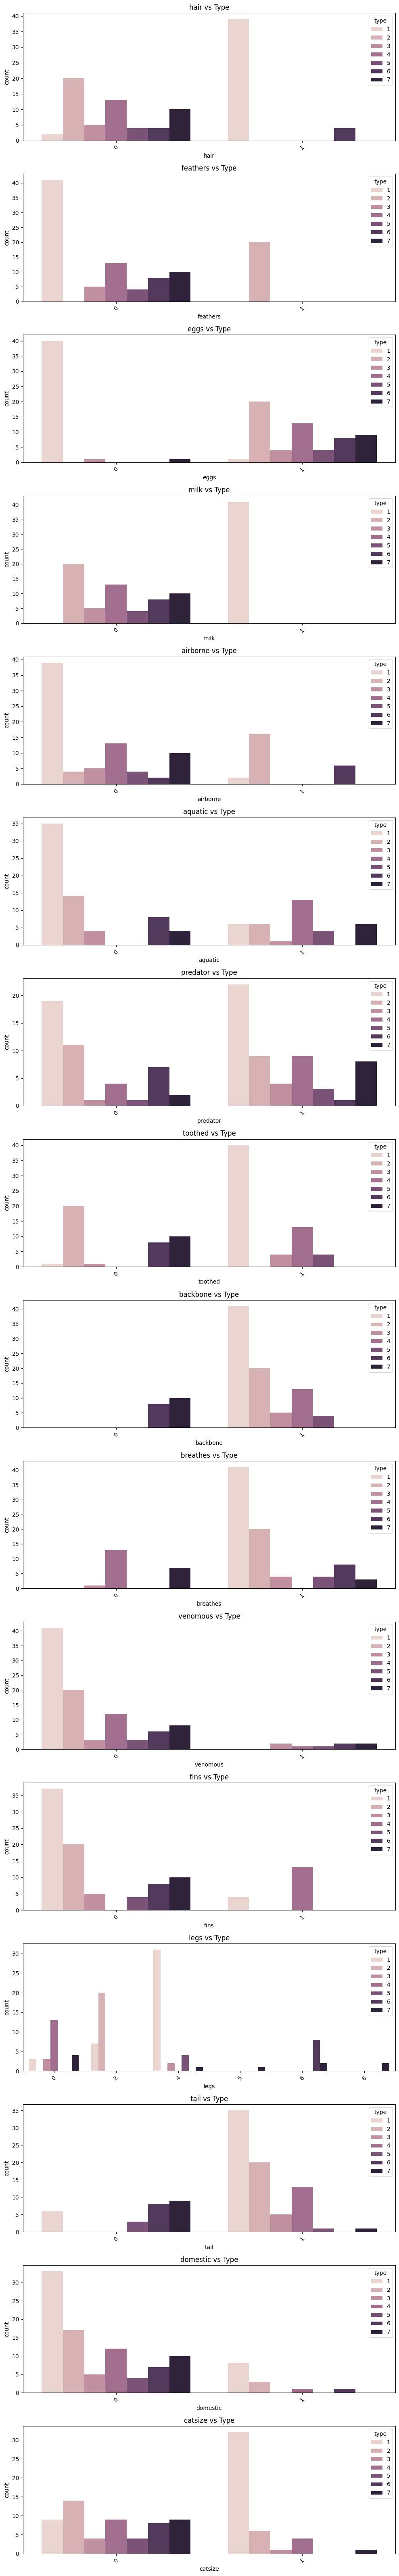

In [142]:
# visualizing countplot for the all catagorical cols to target 'type' column
features = [col for col in df.columns if col != 'type']

fig, axes = plt.subplots(len(features), 1, figsize=(10, 4*len(features)))

for i, col in enumerate(features):
    sns.countplot(x=col, hue='type', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Type')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

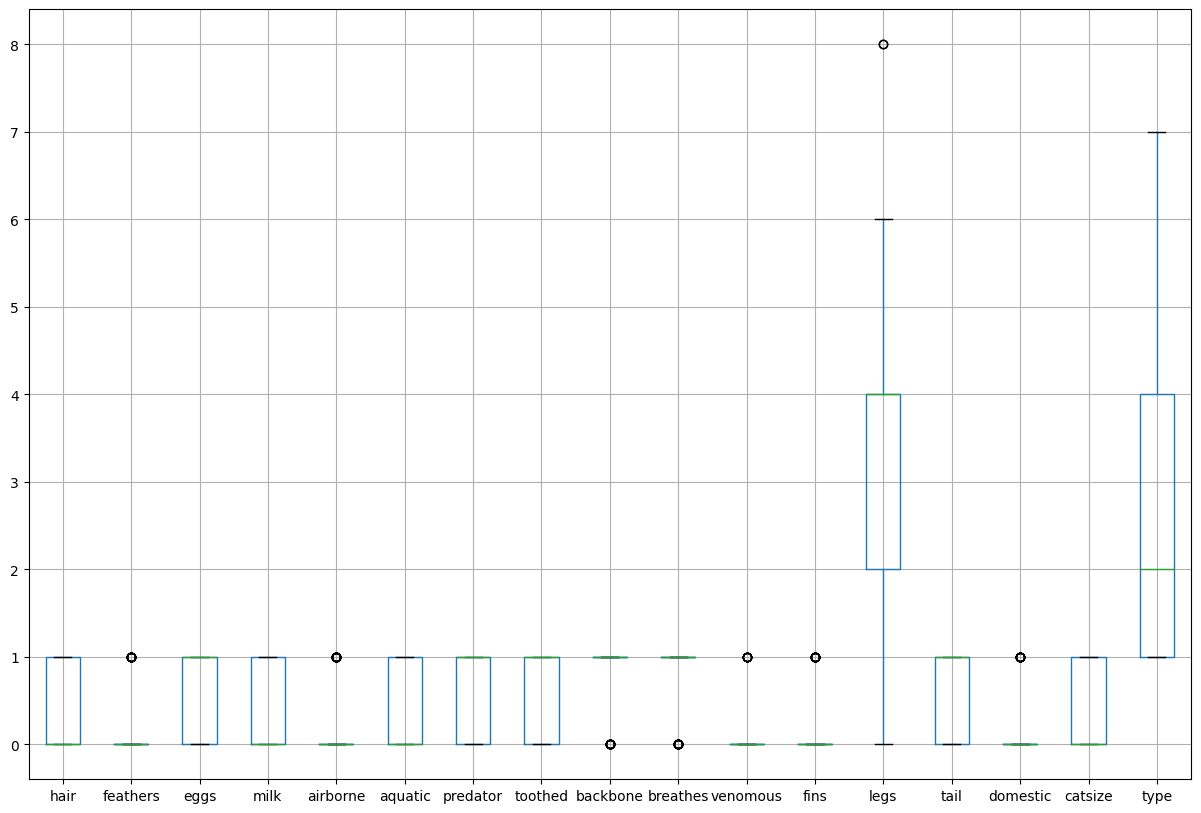

In [143]:
# Box plot for all the cols
plt.figure(figsize=(15,10))
df.boxplot()

In [144]:
df['legs'].value_counts() # as per box plot the legs column has unnatural outliers

legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64

In [145]:
# legs are can't be 5 so removing the unnatural data
# Find mode of legs
mode_val = df['legs'].mode()[0]
# Replace all 5’s with the mode
df['legs'] = df['legs'].replace(5, mode_val)

In [146]:
df[df['legs']==5]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [147]:
X=df.drop('type',axis=1)
y=df['type']

In [148]:
# as the data is having all catagorical columns there is no need scale 

In [149]:
#splitting data into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [150]:
knn=KNeighborsClassifier()

In [151]:
model=knn.fit(X_train,y_train)

In [152]:
y_pred=model.predict(X_test)

In [153]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [154]:
# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 21),       # Try k = 1 to 20
    'metric': ['euclidean', 'manhattan', 'hamming']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy')
grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best Accuracy: 0.9603846153846154


In [155]:
best_knn=grid.best_estimator_
y_pred=best_knn.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred, average='macro'))

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


In [156]:
y_train_pred=best_knn.predict(X_train)
print("Accuracy :", accuracy_score(y_train, y_train_pred))

Accuracy : 1.0


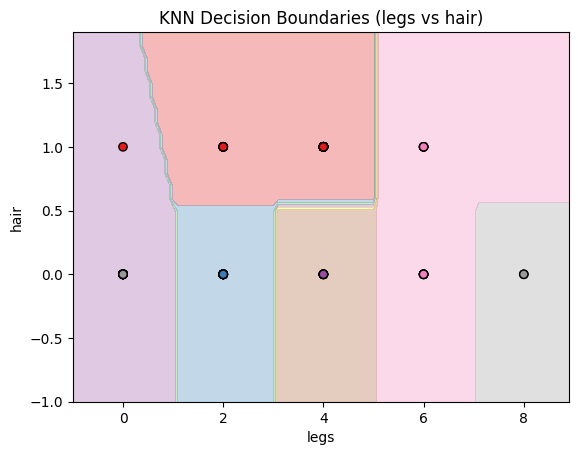

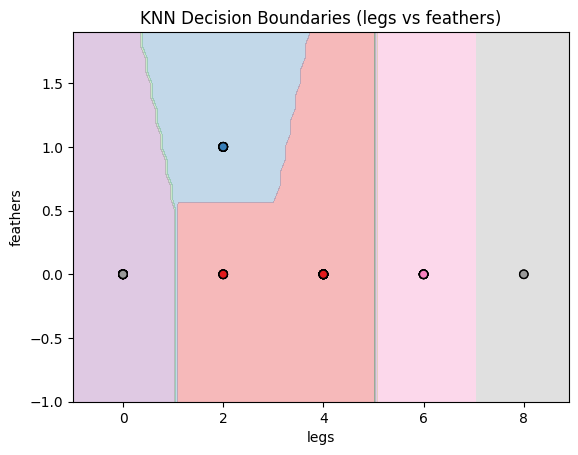

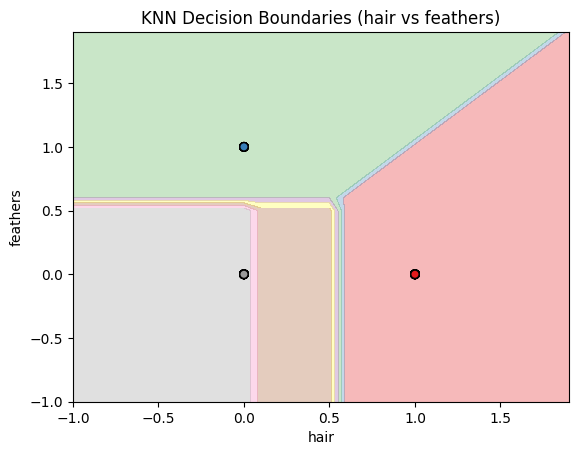

In [157]:
# List of feature pairs you want to visualize
feature_pairs = [
    ('legs', 'hair'),
    ('legs', 'feathers'),
    ('hair', 'feathers')
]

for f1, f2 in feature_pairs:
    X = df[[f1, f2]].values
    y = df['type'].values   
    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)  
    # Create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    # Predict on grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f"KNN Decision Boundaries ({f1} vs {f2})")
    plt.show()


1. **What are the key hyperparameters in KNN?**
* the key hyperparametrs in KNN:
  1. n_neighbours(k)
  2. weights(uniform/distance)
  3. metric('euclidian',manhattan','hamming')
  4. p(1,2..)
  5. algorithm('auto,'ba;;_tree',kde_tree')

2. **What distance metrics can be used in KNN?**
   KNN relies on distance to find the nearest neigbours'.some of the are
   1. Euclidian Distance(default)-best for continuous
   2. manhattan distance-best when features are binary or sparse
   3. Minkowski distance-generalization of euclidian (p=1) and manhattan (p=1)
   4. Hamming distance-useful for catagorical /binary
   5. cosine diatance 
